# LSTM Predection

In [1]:
# Replace this with the actual directory containing the notebook and Python scripts
%cd stock-pred

/mlsteam/lab/stock-pred


In [2]:
# Global settings
WINDOW = 50
EPOCHS = 15
BATCH = 20
TEST_RATIO = .2

DATA_PATH = '/mlsteam/data/stock_prices/20220512_tesla.pkl'
SCALER_PATH = '/lab/trained/scaler.pkl'
MODEL_PATH = '/lab/trained/model'

# Forces to use CPU rather than GPU
# NVIDIA drivers of higher versions have messy implimentation of LSTM!
# Ref: https://github.com/mozilla/DeepSpeech/issues/3088#issuecomment-656056969
# Ref: https://github.com/tensorflow/tensorflow/issues/35950#issuecomment-577427083
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

## Load Data and Model

In [3]:
from train import (load_data, load_scaler, extract_x_y)

stock_dates, stock_prices = load_data(DATA_PATH)
scaler = load_scaler(SCALER_PATH)
scaled_data = scaler.transform(stock_prices[:,None])
train_split = int(len(scaled_data) * (1.0 - TEST_RATIO))
x_test, _ = extract_x_y(scaled_data, window=WINDOW, offset=train_split)

In [4]:
from train import (load_model)

model = load_model(MODEL_PATH)

## Make Prediction

In [5]:
from train import (predict, get_rmse, get_mape)

y_lstm_scaled = model.predict(x_test)
y_lstm = scaler.inverse_transform(y_lstm_scaled)
y_actual = stock_prices[train_split:]

rmse_lstm = get_rmse(pred=y_lstm, actual=y_actual)
mape_lstm = get_mape(pred=y_lstm, actual=y_actual)
print(f'RMSE: {rmse_lstm}, MAPE: {mape_lstm}')

RMSE: 134.61978924280368, MAPE: 0.12298846894746393


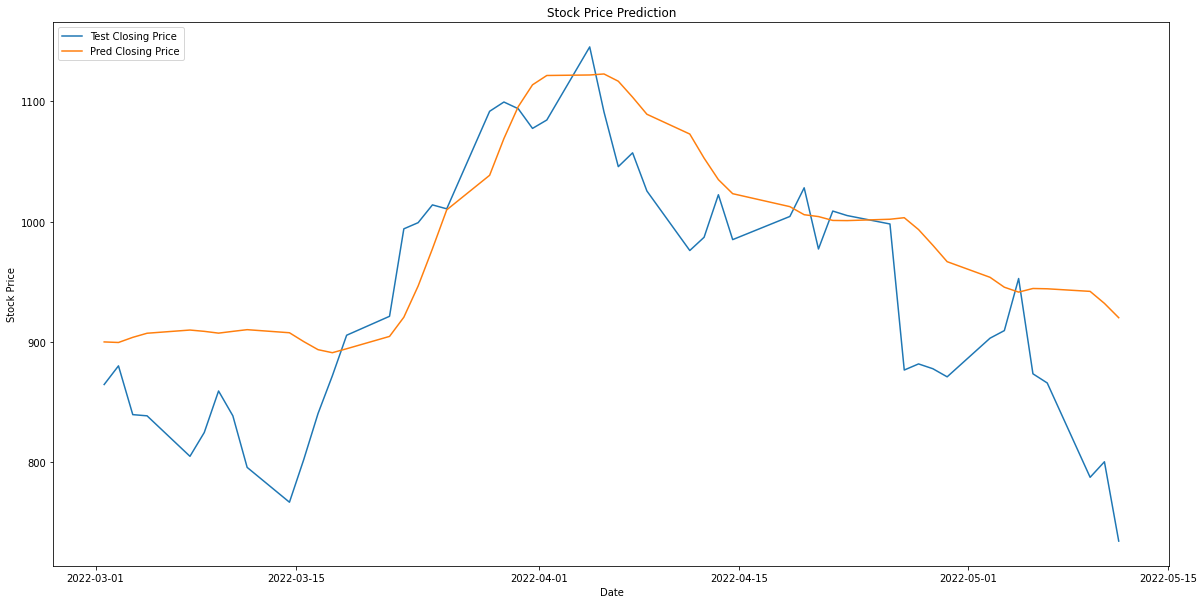

In [6]:
import matplotlib.pyplot as plt

def plot_stock(dates, y_pred, y_actual, train_pos):
    fig = plt.figure(figsize=(20, 10))
    plt.plot(dates[train_pos:], y_actual, label='Test Closing Price')
    plt.plot(dates[train_pos:], y_pred, label='Pred Closing Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend(loc='upper left')

plot_stock(stock_dates, y_lstm, y_actual, train_split)